In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [91]:
# Read data from CSV file
def read_data_from_csv(filename):
    x = []
    y = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        # next(csv_reader)  # Skip header row if present
        for row in csv_reader:
            x.append(float(row[0]))
            y.append((float(row[1])/1000)) #convert to m
    return x, y

In [93]:
x, y = read_data_from_csv('polynomial.csv')

print(f"{x},\n{y}")

[35.4, 34.9, 34.4, 33.9, 33.4, 32.9, 32.4, 31.9, 31.4, 30.9, 30.4, 29.9, 29.4, 28.9, 28.4, 27.9, 27.4, 26.9, 26.4, 25.9, 25.4, 24.9, 24.4, 23.9, 23.4, 22.9, 22.4, 21.9, 21.4, 20.9, 20.4, 19.9, 19.4, 18.9, 18.4, 17.9, 17.4, 16.9, 16.4, 15.9, 15.4, 14.9, 14.4, 13.9, 13.4, 12.9, 12.4, 11.9, 11.4, 10.9, 10.4, 9.9, 9.4, 8.9, 8.4, 7.9, 7.4],
[0.0105, 0.009699999999999999, 0.009, 0.0081, 0.0074, 0.0068, 0.0060999999999999995, 0.0053, 0.0046, 0.0039, 0.0033, 0.0027, 0.0023, 0.002, 0.0017, 0.0015, 0.0013, 0.0011, 0.0009, 0.0008, 0.0006, 0.0005, 0.0005, 0.0004, 0.0004, 0.0003, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0002, -0.0002, -0.0002, -0.0002, -0.0002, -0.0002, -0.0004, -0.0004, -0.0004, -0.0004, -0.0004, -0.0005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [94]:
# Function to calculate the polynomial trendline
def calculate_trendline(x, y, degree):
    coefficients = np.polyfit(x, y, degree)
    # polynomial = np.poly1d(coefficients)
    
    # return polynomial(x)
    return coefficients

In [95]:
coefficients = calculate_trendline(x, y, 6)
derivative = np.polyder(coefficients)
second_derivative = np.polyder(coefficients, m=2)

print(f"{coefficients}, \n{derivative}, \n{second_derivative}")

[-6.54293156e-10  8.09192123e-08 -3.90290953e-06  9.40570550e-05
 -1.18615683e-03  7.35305872e-03 -1.75519957e-02], 
[-3.92575894e-09  4.04596061e-07 -1.56116381e-05  2.82171165e-04
 -2.37231366e-03  7.35305872e-03], 
[-1.96287947e-08  1.61838425e-06 -4.68349144e-05  5.64342330e-04
 -2.37231366e-03]


In [96]:
num = 2 # find derivative at No.xxx

xplot=np.linspace(min(x), max(x), 100)
yplot=np.polyval(coefficients, xplot)
yder=np.polyval(derivative, x)
y2der=np.polyval(second_derivative, x)


# print(f"derivative @No.{num} is {yder}\nsecond_derivative @No.{num} is {y2der}")
print(f"derivative is {yder}\nsecond_derivative is {y2der}")

derivative is [ 1.55629268e-03  1.59689346e-03  1.60529008e-03  1.58648550e-03
  1.54507673e-03  1.48526957e-03  1.41089329e-03  1.32541538e-03
  1.23195626e-03  1.13330402e-03  1.03192911e-03  9.29999090e-04
  8.29393341e-04  7.31717785e-04  6.38319606e-04  5.50301977e-04
  4.68538777e-04  3.93689314e-04  3.26213048e-04  2.66384309e-04
  2.14307022e-04  1.69929428e-04  1.33058804e-04  1.03376186e-04
  8.04510905e-05  6.37562352e-05  5.26822618e-05  4.65524564e-05
  4.46374723e-05  4.61700505e-05  5.03597420e-05  5.64076292e-05
  6.35210474e-05  7.09283065e-05  7.78934126e-05  8.37307894e-05
  8.78200003e-05  8.96204692e-05  8.86862029e-05  8.46805123e-05
  7.73907339e-05  6.67429516e-05  5.28167183e-05  3.58597774e-05
  1.63027844e-05 -5.22597151e-06 -2.78858458e-05 -5.06091169e-05
 -7.20862648e-05 -9.07512496e-05 -1.04766789e-04 -1.12009639e-04
 -1.10055869e-04 -9.61661418e-05 -6.72709938e-05 -1.99561105e-05
  4.95523937e-05]
second_derivative is [-1.16949901e-04 -4.72606093e-05  1.2

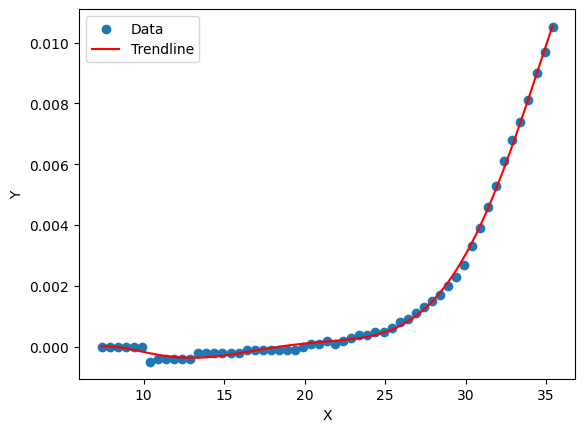

In [97]:
# Plot the original data and trendline
plt.scatter(x, y, label='Data')
plt.plot(xplot, yplot, color='red', label='Trendline')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

In [98]:
# Find curvature K at every signle point in array x
k = []

for i, j in zip(yder, y2der):
    # result = j/(pow((1+pow(i, 2),3/2)))
    result = j/((1+i**2)**(3/2))
    k.append(result)
    
print(k)

[-0.00011694947572298494, -4.72604284763239e-05, 1.2006935507595882e-05, 6.167926506610775e-05, 0.00010255375337664864, 0.00013539814056218004, 0.0001609507167571871, 0.00017992032499422947, 0.00019298636358162832, 0.00020079878785078187, 0.0002039781112825352, 0.00020311540609620684, 0.00019877230341870918, 0.0001914809931587905, 0.0001817442237014272, 0.00017003530151794437, 0.00015679809076477624, 0.0001424470129203426, 0.0001273670464887192, 0.0001119137267816207, 9.641314577745205e-05, 8.116195204754297e-05, 6.642735073490486e-05, 5.244710356943009e-05, 3.942952890421548e-05, 2.7553501760181925e-05, 1.6968453869559084e-05, 7.794373712276398e-06, 1.2180654256611122e-07, -5.9881455942072905e-06, -1.0503823852811183e-05, -1.3423012584796085e-05, -1.4772939337793479e-05, -1.4610274855135939e-05, -1.3021133074522984e-05, -1.0121071125321233e-05, -6.0550893251814946e-06, -9.976311771060452e-07, 4.847416631670134e-06, 1.1246724228032468e-05, 1.793751854842048e-05, 2.4627583332235028e-05,

In [99]:
# Find Bending Moment

BM = []
for item in k:
    BM.append(item * 27000000 * 0.144) #unit in kN*m

print(BM)


[-454.6995616109654, -183.7485459159473, 46.682965253532785, 239.80898257702694, 398.7289931284099, 526.427970505756, 625.7763867519435, 699.5302235775641, 750.3309816053708, 780.7056871638398, 793.0668966664967, 789.7126989020521, 772.8267156919412, 744.4781014013774, 706.6215417511489, 661.0972523017676, 609.63097689345, 553.8339862342921, 495.2030767481403, 435.12056972694126, 374.8543107827336, 315.55766956084705, 258.2695396573101, 203.91433867794416, 153.30200837958978, 107.12801484358731, 65.97334864484571, 30.304524993330634, 0.4735838374970404, -23.28191007027794, -40.83886713972987, -52.18867292968718, -57.43718814534105, -56.80474863676853, -50.62616539374536, -39.35072453524895, -23.54218729630565, -3.8787900165883036, 18.846755863933478, 43.727263798590236, 69.74107211625882, 95.75204399572978, 120.50956743988836, 142.6485552599434, 160.68944508020334, 173.03819936986147, 177.98630550026553, 173.71077581379615, 158.27414767673676, 129.62448347727297, 85.59537052888061, 23.

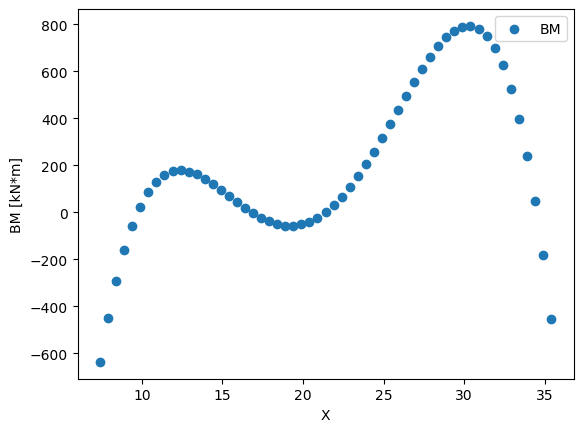

In [102]:
plt.scatter(x, BM, label='BM')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('BM [kN*m]')
plt.legend()

# Show the plot
plt.show()